Practice

# Handling missing values

In [1]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from scipy.stats import t
import warnings
warnings.filterwarnings('ignore')

# 2.1.1 EM for bivariate Gaussian data

In [2]:
#R1
n=100
r=math.floor(n*0.3)
mu=[5, -1]
Sigma=[[1.3,0.4],[0.4,0.9]]
Y=np.random.multivariate_normal(size=n,mean=mu,cov=Sigma)
f=[1 for i in range(n-r)]
g=[0 for i in range(r)]
h=f+g
random.seed(50)
random.shuffle(h)
for i in range(len(h)):
    if h[i]==0:
        Y[i,1]=None

In [3]:
#R2
hat_mu1=(1/n)*sum(Y[:,0])
# cleared_arr - выделяет из массива подмассив непропущенных данных
def cleared_arr(a):
    b=list()
    for i in range(len(a)):
        if np.isnan(Y[i,1])==False:
            b.append(Y[i])
    return np.squeeze(b)

def estimators(a):
    y1_bar=np.mean(a[:,0])
    y2_bar=np.mean(a[:,1])
    s11=np.mean((a[:,0]-y1_bar)**2)
    s22=np.mean((a[:,1]-y2_bar)**2)
    s12=np.mean((a[:,0]-y1_bar)*(a[:,1]-y2_bar))
    return y1_bar, y2_bar, s11, s22, s12
y1_bar, y2_bar, s11, s22, s12 = estimators(cleared_arr(Y))
hat_beta_21_1=s12/s11
hat_beta_20_1 = y2_bar-hat_beta_21_1*y1_bar
hat_mu2=hat_beta_21_1*hat_mu1+hat_beta_20_1
res_ml=(hat_mu1,hat_mu2)

In [4]:
#R3
def Estep(Y,mu,Sigma):
    n=len(Y)
    sigma_22_1=Sigma[1,1]-(Sigma[0,1]**2)/Sigma[0,0]
    beta_21_1=Sigma[0,1]/Sigma[0,0]
    beta_20_1=mu[1]-beta_21_1*mu[0]
    E_y2=np.zeros(n)
    for i in range(len(Y)):
        if np.isnan(Y[i,1])==True:
            E_y2[i]=beta_20_1+beta_21_1*Y[i,0]
        else:
            E_y2[i]=Y[i,1]
    E_y1=Y[:,0].copy()
    E_y2_y2=np.zeros(n)
    for i in range(len(E_y2)):
        if np.isnan(Y[i,1])==True:
            E_y2_y2[i]=E_y2[i]**2+sigma_22_1
        else: 
            E_y2_y2[i]=E_y2[i]**2
    E_y1_y1=Y[:,0]**2
    E_y1_y2=np.zeros(n)
    E_y1_y2=E_y2*E_y1
    return sum(E_y1), sum(E_y2), sum(E_y1_y1), sum(E_y1_y2), sum(E_y2_y2)
# s1, s2, s11, s12, s22
def Mstep(Y, s1, s2, s11, s12, s22):
    n=len(Y)
    mu1=s1/n
    mu2=s2/n
    sigma1=s11/n-mu1**2
    sigma2=s22/n-mu2**2
    sigma12=s12/n-mu1*mu2
    mu=np.array([mu1,mu2],dtype=np.float64)
    Sigma=np.array([[sigma1,sigma12],[sigma12,sigma2]],dtype=np.float64)
    return mu,Sigma
            
    



In [5]:
#R4
def initEM(Y):
    n=len(Y)
    mv=0
    for i in range(len(Y)):
        if np.isnan(Y[i,1])==True:
            mv+=1
    r=n-mv
    mu1=np.mean(Y[:,0])
    Z=Y[:,1]
    Z0=list()
    for i in range(len(Y)):
        if np.isnan(Y[i,1])==False:
            Z0.append(Y[i,0])
    Z = Z[~np.isnan(Z)]
    mu2=np.mean(Z)
    s1=np.mean(Y[:,0]**2)-mu1**2
    s2=np.mean(Z)-mu2**2
    s12=np.mean(Z0*Z)-mu1*mu2
    mu=np.array([mu1,mu2],dtype=np.float64)
    Sigma=np.array([[s1,s12],[s12,s2]],dtype=np.float64)
    return mu,Sigma
    


mu: [ 4.70781431 -1.11892575] 
 Sigma: [[ 1.31592928  0.365723  ]
 [ 0.365723   -2.37092058]]


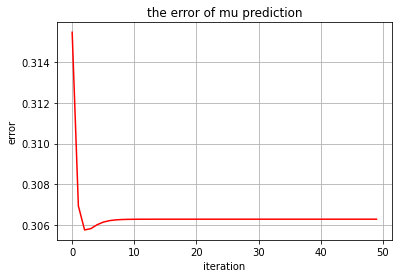

In [6]:
#R5
i_mu,i_Sigma=initEM(Y)
hat_mu=i_mu.copy()
hat_Sigma=i_Sigma.copy()
print('mu:',i_mu,'\n','Sigma:',i_Sigma)
error_mu=np.zeros(50)

for i in range(50):
    error_mu[i]=np.sqrt(sum((hat_mu-mu)**2))
    s1, s2, s11, s12, s22 = Estep(Y,hat_mu, hat_Sigma)
    hat_mu,hat_Sigma = Mstep(Y, s1, s2, s11, s12, s22)
plt.plot(list(error_mu),color='red')
plt.title('the error of mu prediction')
plt.xlabel('iteration')
plt.ylabel('error')
plt.grid()
plt.show()
    


In [7]:
#R6
resEM=hat_mu
print('res_ml',res_ml)
print('resEM',resEM)

res_ml (4.707814314323743, -1.0918605290892747)
resEM [ 4.70781431 -1.09186053]


In [8]:
#Q7
i_mu,i_Sigma=initEM(Y)
hat_mu=i_mu.copy()
old_hat_mu=old_old_hat_mu=0
hat_Sigma=i_Sigma.copy()
error_mu=np.zeros(20)
for i in range(20):
    old_old_hat_mu=old_hat_mu
    old_hat_mu=hat_mu
    s1, s2, s11, s12, s22 = Estep(Y,hat_mu, hat_Sigma)
    hat_mu,hat_Sigma = Mstep(Y, s1, s2, s11, s12, s22)
    if (i>=3):
        print('Iteration=',i,", Convergence rate of mu2 =",(hat_mu-old_hat_mu)[1]/(old_hat_mu-old_old_hat_mu)[1],'\n')
num_miss=0
num=len(Y[:,1])
for i in range(len(Y)):
    if np.isnan(Y[i,1]):
        num_miss+=1
print("Percentage of missingness is:", num_miss/num)

Iteration= 3 , Convergence rate of mu2 = 3.0082025343912235 

Iteration= 4 , Convergence rate of mu2 = 0.6903532459681069 

Iteration= 5 , Convergence rate of mu2 = 0.5527486689549578 

Iteration= 6 , Convergence rate of mu2 = 0.5082896440950968 

Iteration= 7 , Convergence rate of mu2 = 0.48878010110706716 

Iteration= 8 , Convergence rate of mu2 = 0.47909847187660914 

Iteration= 9 , Convergence rate of mu2 = 0.4740012178791624 

Iteration= 10 , Convergence rate of mu2 = 0.47123390562743095 

Iteration= 11 , Convergence rate of mu2 = 0.4697064510632357 

Iteration= 12 , Convergence rate of mu2 = 0.46885564352500675 

Iteration= 13 , Convergence rate of mu2 = 0.46837933112485114 

Iteration= 14 , Convergence rate of mu2 = 0.468111918953527 

Iteration= 15 , Convergence rate of mu2 = 0.4679615497607198 

Iteration= 16 , Convergence rate of mu2 = 0.46787691834223283 

Iteration= 17 , Convergence rate of mu2 = 0.46782926211418546 

Iteration= 18 , Convergence rate of mu2 = 0.467802424516

In [9]:
#R7-1
n = 100
r = math.floor(n*0.3)
mu = [5, -1]
Sigma = [[1.3,0.4],[0.4,0.9]]
Y=np.random.multivariate_normal(size=n,mean=mu,cov=Sigma)
f=[1 for i in range(n-r)]
g=[0 for i in range(r)]
h=f+g
random.shuffle(h)
Y1=Y.copy()
for i in range(len(h)):
    if h[i]==0:
        Y1[i,1]=None
Y2=Y.copy()
MinValueToDelete=np.flip(np.sort(Y[:,1]))[29]
deletescore=0
for i in range(len(Y2)):
    if deletescore<30 and Y2[i,1]>=MinValueToDelete:
        Y2[i,1]=None


In [10]:
#R7-2
i1_mu, i1_Sigma = initEM(Y1)
hat_mu_MAR=i1_mu
hat_Sigma_MAR=i1_Sigma
i2_mu, i2_Sigma = initEM(Y2)
hat_mu_MNAR=i2_mu
hat_Sigma_MNAR=i2_Sigma

#MAR
i1_mu, i1_Sigma = initEM(Y1)
hat_mu_MAR=i1_mu
hat_Sigma_MAR=i1_Sigma
error_mu=np.zeros(50)
for i in range(50):
    error_mu[i]=np.sqrt(sum((hat_mu_MAR-mu)**2))
    # E step
    s1, s2, s11, s12, s22=Estep(Y1, hat_mu_MAR, hat_Sigma_MAR)
    hat_mu_MAR, hat_Sigma_MAR=Mstep(Y1, s1, s2, s11, s22, s12)


#MNAR
i2_mu, i2_Sigma = initEM(Y2)
hat_mu_MNAR=i2_mu
hat_Sigma_MNAR=i2_Sigma
error_mu=np.zeros(50)
for i in range(50):
    error_mu[i]=np.sqrt(sum((hat_mu_MNAR-mu)**2))
    # E step
    s1, s2, s11, s12, s22=Estep(Y2, hat_mu_MNAR, hat_Sigma_MNAR)
    hat_mu_MNAR, hat_Sigma_MNAR=Mstep(Y2, s1, s2, s11, s22, s12)

print('hat_mu_MAR:',hat_mu_MAR)
print('hat_mu_MNAR:',hat_mu_MNAR)
print('hat_Sigma_MAR:',hat_Sigma_MAR)
print('hat_Sigma_MNAR:',hat_Sigma_MNAR)

hat_mu_MAR: [ 4.98683851 -0.73013714]
hat_mu_MNAR: [ 4.98683851 -0.65146219]
hat_Sigma_MAR: [[ 1.46189833  3.63150209]
 [ 3.63150209 -2.98024714]]
hat_Sigma_MNAR: [[ 1.46189833  5.26229248]
 [ 5.26229248 -1.41871855]]


# 3 Single imputation

# 3.1 Single imputation with the means or with regression - bivariate case

In [11]:
n=100

In [12]:
# Вспомогательные функции
# Отрисовка графика
def plot_maker(X1,Y1,X2,Y2,title):
    plt.title(title)
    plt.scatter(X1,Y1,color='blue',label='known data')
    plt.scatter(X2,Y2,color='red',label='imputed data')
    plt.xlim([50,200])
    plt.ylim([50,200])
    plt.legend(loc='upper left')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.show()
# Гауссовский шум, нужен для Stochastic regression imputation
def gaussian_noise(x, mu = 0, std=None, random_state = 8):
    rs = np.random.RandomState(random_state)
    noise = rs.normal(mu, std, size = x.shape)
    return x + noise
# Создаем двумерное нормальное распределение и случайным образом определяем 73 пропуска
def data_maker(n=100):    
    sigma=np.array([[625,375],[375,625]], dtype=np.float64)
    don=np.random.multivariate_normal(size=n,mean=[125,125],cov=sigma)
    f=[1 for i in range(27)]
    g=[0 for i in range(73)]
    h=f+g
    random.shuffle(h)
    donmiss=don.copy()
    for i in range(len(donmiss)):
        if h[i]==0:
            donmiss[i,1]=np.nan
    return don, donmiss
    

In [13]:
don, donmiss = data_maker()

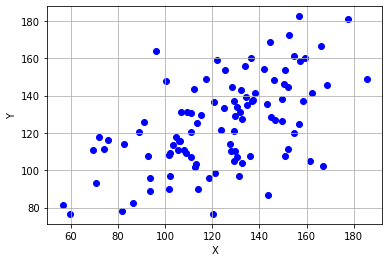

In [14]:
plt.scatter(don[:,0],don[:,1],color='blue')
plt.grid()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [15]:
d1=np.mean((donmiss[:,1])[~np.isnan(donmiss[:,1])])
d_miss=np.zeros((73,2))
d_obs=np.zeros((27,2))
k1=0
k2=0
for i in range(len(donmiss)):
    if np.isnan(donmiss[i,1]):
        d_miss[k1]=[donmiss[i,0],d1]
        k1+=1
    else:
        d_obs[k2]=donmiss[i]
        k2+=1

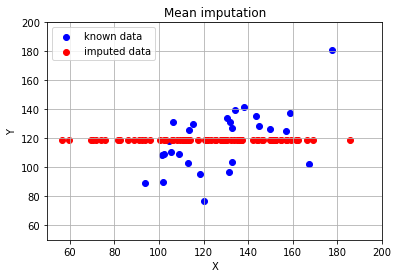

In [16]:
plot_maker(d_obs[:,0],d_obs[:,1],d_miss[:,0],d_miss[:,1],"Mean imputation")

In [17]:
reg = linear_model.LinearRegression()
reg.fit(d_obs[:,0].reshape((-1,1)),d_obs[:,1])
e_miss=np.zeros((73,2))
k3=0
for i in range(len(donmiss)):
    if np.isnan(donmiss[i,1]):
        e_miss[k3]=[donmiss[i,0],reg.coef_*donmiss[i,0]+reg.intercept_]
        k3+=1

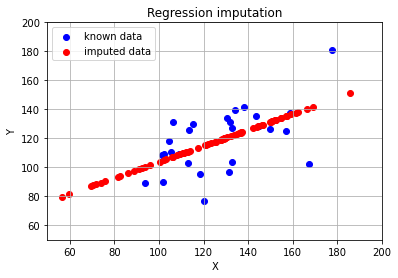

In [18]:
plot_maker(d_obs[:,0],d_obs[:,1],e_miss[:,0],e_miss[:,1],"Regression imputation")

In [19]:
m_obs=reg.coef_*d_obs[:,0]+reg.intercept_
m_miss=reg.coef_*d_miss[:,0]+reg.intercept_
sigma=np.sqrt(np.var(d_obs[:,1]))
stch_impute=gaussian_noise(m_miss,mu=0,std=sigma)

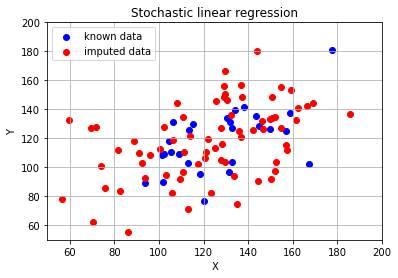

In [20]:
plot_maker(d_obs[:,0],d_obs[:,1],e_miss[:,0],stch_impute,"Stochastic linear regression")

In [21]:
imputed_data=np.array([list(d_miss[:,1])+list(d_obs[:,1]),list(e_miss[:,1])+list(d_obs[:,1]),list(stch_impute)+list(d_obs[:,1])])

In [22]:
def results_maker(X):
    d=np.zeros((7,3))
    for i in range(3):
        d[0,i]=np.mean(X[i])
        d[1,i]=np.sqrt(np.var(X[i]))
        d[2,i]=np.corrcoef(X[i],don[:,0])[0,1]
        d[3,i]=d[0,i]-d[1,i]*t.ppf(0.975,99)/np.sqrt(n)
        d[4,i]=d[0,i]+d[1,i]*t.ppf(0.975,99)/np.sqrt(n)
        d[5,i]=d[4,i]-d[3,i]
        d[6,i]=int(d[4,i]>125 and 125>d[3,i])
    return d

In [23]:
results=results_maker(imputed_data)

In [24]:
def SimuMiss():
    don, donmiss = data_maker()
    d1=np.mean((donmiss[:,1])[~np.isnan(donmiss[:,1])])
    d_miss=np.zeros((73,2))
    d_obs=np.zeros((27,2))
    k1=0
    k2=0
    for i in range(len(donmiss)):
        if np.isnan(donmiss[i,1]):
            d_miss[k1]=[donmiss[i,0],d1]
            k1+=1
        else:
            d_obs[k2]=donmiss[i]
            k2+=1
    reg = linear_model.LinearRegression()
    reg.fit(d_obs[:,0].reshape((-1,1)),d_obs[:,1])
    e_miss=np.zeros((73,2))
    k3=0
    for i in range(len(donmiss)):
        if np.isnan(donmiss[i,1]):
            e_miss[k3]=[donmiss[i,0],reg.coef_*donmiss[i,0]+reg.intercept_]
            k3+=1
    m_obs=reg.coef_*d_obs[:,0]+reg.intercept_
    m_miss=reg.coef_*d_miss[:,0]+reg.intercept_
    #sigma=np.sqrt(np.var(d_obs[:,1]))
    sigma=np.sqrt(np.var(d_obs[:,1]-m_obs))
    stch_impute=gaussian_noise(m_miss,mu=0,std=sigma)
    imputed_data=np.array([list(d_miss[:,1])+list(d_obs[:,1]),list(e_miss[:,1])+list(d_obs[:,1]),list(stch_impute)+list(d_obs[:,1])])
    pre_results=results_maker(imputed_data)
    results=[pre_results[0],pre_results[5],pre_results[6]]
    return results
    
    

In [25]:
thousand_results=np.zeros((1000,3,3),dtype=np.float64)
thr=thousand_results
for i in range(1000):
    thr[i]=SimuMiss()
bias=[np.mean(thr[:,0,0]-125),np.mean(thr[:,0,1]-125),np.mean(thr[:,0,2]-125)]
cov=[np.mean(thr[:,2,0]),np.mean(thr[:,2,1]),np.mean(thr[:,2,2])]
avg_width=[np.average(thr[:,1,0]),np.average(thr[:,1,1]),np.average(thr[:,1,2])]
res=[bias,cov,avg_width]
print(pd.DataFrame(data=res,index=['bias','cov','avg_width'],columns=['MEAN','REG','STOCH']))

               MEAN       REG      STOCH
bias       0.247856  0.154895   0.758609
cov        0.362000  0.598000   0.764000
avg_width  5.008745  7.211655  10.372385


Функции создания пропущенных значений разных типов

In [26]:
#3.2.8
def MCAR(arr):
    f=[1 for i in range(27)]
    g=[0 for i in range(73)]
    na=73
    h=f+g
    random.shuffle(h)
    for i in range(len(arr)):
        if h[i]==0:
            arr[i,1]=np.nan
    return arr, na
    
def MAR(arr):
    na=0
    for i in range(len(arr)):
        if arr[i,0]<=140:
            arr[i,1]=None
            na+=1
    return arr, na
    
def MNAR(arr):
    na=0
    for i in range(len(arr)):
        if arr[i,1]<=140:
            arr[i,1]=None
            na+=1
    return arr, na
def alt_results(X,na):
    d=np.zeros((6,4))
    for i in range(4):
        d[0,i]=np.mean(X[i])
        d[1,i]=np.sqrt(np.var(X[i]))
        if i==0:
            d[2,0]=d[0,0]-d[0,1]*t.ppf(0.975,100-na-1)/np.sqrt(100-na-1)
            d[3,0]=d[0,0]+d[0,1]*t.ppf(0.975,100-na-1)/np.sqrt(100-na-1)
        else:
            d[2,i]=d[0,i]-d[1,i]*t.ppf(0.975,99)/np.sqrt(n)
            d[3,i]=d[0,i]+d[1,i]*t.ppf(0.975,99)/np.sqrt(n)
        d[4,i]=d[3,i]-d[2,i]
        d[5,i]=int(d[3,i]>125 and 125>d[2,i])
    return d

In [27]:
def SimuMiss_(method):
    na=0
    don=np.random.multivariate_normal(size=n,mean=[125,125],cov=np.array([[625,375],[375,625]]))
    donmiss=don.copy()
    if method=='MAR':
        donmiss, na=MAR(donmiss)      
    if method=='MCAR':
        donmiss, na=MCAR(donmiss)
    if method=='MNAR':
        donmiss, na=MNAR(donmiss)  
    d1=np.mean((donmiss[:,1])[~np.isnan(donmiss[:,1])])
    d_miss=np.zeros((na,2))
    d_obs=np.zeros((100-na,2))
    k1=0
    k2=0
    for i in range(len(donmiss)):
        if np.isnan(donmiss[i,1]):
            d_miss[k1]=[donmiss[i,0],d1]
            k1+=1
        else:
            d_obs[k2]=donmiss[i]
            k2+=1
    reg = linear_model.LinearRegression()
    reg.fit(d_obs[:,0].reshape((-1,1)),d_obs[:,1])
    e_miss=np.zeros((na,2))
    k3=0
    for i in range(len(donmiss)):
        if np.isnan(donmiss[i,1]):
            e_miss[k3]=[donmiss[i,0],reg.coef_*donmiss[i,0]+reg.intercept_]
            k3+=1
    m_obs=reg.coef_*d_obs[:,0]+reg.intercept_
    m_miss=reg.coef_*d_miss[:,0]+reg.intercept_
    sd=np.sqrt(np.var(d_obs[:,1]-m_obs))
    stch_impute=gaussian_noise(m_miss,mu=0,std=sd)
    imputed_data=np.array([list((donmiss[:,1])[~np.isnan(donmiss[:,1])]),list(d_miss[:,1])+list(d_obs[:,1]),list(e_miss[:,1])+list(d_obs[:,1]),list(stch_impute)+list(d_obs[:,1])])
    pre_results=alt_results(imputed_data,na)
    results=np.array(pre_results)
    return results
    

In [28]:
col_names=["CA", "MEAN","REG", "STOCH"]
ind_names=["muhat_y", "sigmahat_y", "inf", "sup", "width", "coverage"]
MAT=np.zeros((6,4))+SimuMiss_("MCAR")
MAT1=np.zeros((6,4))+SimuMiss_("MAR")
MAT2=np.zeros((6,4))+SimuMiss_("MNAR")
print(pd.DataFrame(data=MAT,columns=col_names, index=ind_names))
print(pd.DataFrame(data=MAT1,columns=col_names, index=ind_names))
print(pd.DataFrame(data=MAT2,columns=col_names, index=ind_names))

                    CA        MEAN         REG       STOCH
muhat_y     122.515044  122.515044  119.838058  120.331963
sigmahat_y   24.131080   12.538877   22.303431   28.005761
inf         122.515044  120.027058  115.412573  114.775013
sup         122.515044  125.003029  124.263542  125.888914
width         0.000000    4.975970    8.850969   11.113901
coverage      0.000000    1.000000    0.000000    1.000000
                    CA        MEAN         REG       STOCH
muhat_y     147.292685  147.292685  117.784132  118.068723
sigmahat_y   18.877625   10.510617   25.951053   30.289959
inf         147.292685  145.207150  112.634880  112.058538
sup         147.292685  149.378219  122.933384  124.078908
width         0.000000    4.171069   10.298504   12.020370
coverage      0.000000    0.000000    0.000000    0.000000
                    CA        MEAN         REG       STOCH
muhat_y     152.173213  152.173213  149.832565  149.958203
sigmahat_y   10.219715    6.131829    7.008822   10.8405

# 5 Multiple Imputation

In [29]:
def the_sample(X,n):
    sample=list()
    inds=np.random.randint(0, len(X),n)
    for i in range(len(inds)):
        sample.append(X[inds[i]])
    sample=np.array(sample)
    return sample[~np.isnan(sample[:,1])]
def impult(method,M):
    na=0
    don=np.random.multivariate_normal(size=n,mean=[125,125],cov=np.array([[625,375],[375,625]]))
    donmiss=don.copy()
    if method=='MAR':
        donmiss, na=MAR(donmiss)      
    if method=='MCAR':
        donmiss, na=MCAR(donmiss)
    if method=='MNAR':
        donmiss, na=MNAR(donmiss) 
    ThetaHat = [0 for i1 in range(100)]
    VarThetaHat = [0 for i1 in range(100)]
    for i in range(M):
        # Создаем копию массива
        donstch=donmiss.copy()
        # Создаем подмассив, включающий все пары с пропущенным 2-м элементом и заполняем его
        donstch_miss=list()
        # Создаем подмассив, включающий только полные пары элементов
        donstch_obs=list()
        for j in range(len(donstch)):
            if np.isnan(donstch[j][1]):
                donstch_miss.append(donstch[j])
            else:
                donstch_obs.append(donstch[j])
        donstch_miss=np.array(donstch_miss)
        donstch_obs=np.array(donstch_obs)
        # Создаем выборку с возвращением из 100 элементов 
        sample=the_sample(donstch,100)
        #
        reg = linear_model.LinearRegression()
        # Обучаем выборку на известных данных
        reg.fit(sample[:,0].reshape((-1,1)),sample[:,1])
        # Предсказываем по первым элементам наблюдаемых данных,взятых из выборки sample,вторые элементы
        reg_y=reg.predict(sample[:,0].reshape((-1,1)))
        # Остаточная регрессия полученная по наблюдаемым данным
        sd=np.sqrt(np.var(reg_y-sample[:,1]))
        # Предсказываем пропуски вторых элементов по известным первым элементом
        donstch_miss[:,1]=reg.predict(donstch_miss[:,0].reshape((-1,1)))
        stch_impute=gaussian_noise(donstch_miss[:,1],mu=0,std=sd)
        donstch_full=np.array(list(donstch_obs)+list(donstch_miss))
        ThetaHat[i] = np.mean(donstch_full[:, 1])
        VarThetaHat[i] = np.var(donstch_full[:, 1])/10
    ThetaHat=np.array(ThetaHat)
    VarThetaHat=np.array(VarThetaHat)
    ThetaHatBar=np.mean(np.array(ThetaHat))
    T=np.mean(VarThetaHat)+(1+1/M)*np.var(ThetaHat)
    Imddf=(M-1)*(1+np.mean(VarThetaHat)/((M+1)*np.var(ThetaHat)))**2
    IMINF=ThetaHatBar-t.ppf(0.975,df=Imddf)*np.sqrt(T)
    IMSUP=ThetaHatBar+t.ppf(0.975,df=Imddf)*np.sqrt(T)
    IMINCI = (125<=IMSUP) and (125>=IMINF)
    IMWIDTH = IMSUP - IMINF
    return [ThetaHatBar,IMINF,IMSUP,IMINCI,IMWIDTH]

In [30]:
MAT= np.zeros(5)
MAT1 = np.zeros(5)
MAT2 = np.zeros(5)
MAT = MAT + impult("MCAR", M = 100)
MAT1 = MAT1 + impult("MAR", M = 100)
MAT2 = MAT2 + impult("MNAR", M = 100)
param_names=['ThetaHatBar', 'IMINF', 'IMSUP', 'IMINCI', 'IMWIDTH']
print(pd.DataFrame(data=MAT,index=param_names,columns=["value"]))
print(pd.DataFrame(data=MAT1,index=param_names,columns=["value"]))
print(pd.DataFrame(data=MAT2,index=param_names,columns=["value"]))

                  value
ThetaHatBar  127.670147
IMINF        111.766488
IMSUP        143.573807
IMINCI         1.000000
IMWIDTH       31.807319
                  value
ThetaHatBar  118.257534
IMINF         88.883296
IMSUP        147.631773
IMINCI         1.000000
IMWIDTH       58.748476
                  value
ThetaHatBar  150.530698
IMINF        144.549269
IMSUP        156.512127
IMINCI         0.000000
IMWIDTH       11.962858
